<a href="https://colab.research.google.com/github/GauravSahani1417/BERT-Implementation/blob/master/BERT_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
!pip install tensorflow==1.15
!pip install tensorflow_hub==0.7.0

In [32]:
import tensorflow as tf
import tensorflow_hub as hub

In [33]:
print("tensorflow version : ", tf.__version__)
print("tensorflow_hub version : ", hub.__version__)

tensorflow version :  1.15.0
tensorflow_hub version :  0.7.0


In [34]:
import pandas as pd
from datetime import datetime
from sklearn.model_selection import train_test_split
import os

In [35]:
#Installing BERT module
!pip install bert-tensorflow==1.0.1

In [36]:
import bert
from bert import run_classifier
from bert import optimization
from bert import tokenization

In [38]:
OUTPUT_DIR = '/content/drive/My Drive/BERT'

#@markdown Whether or not to clear/delete the directory and create a new one
DO_DELETE = False #@param {type:"boolean"}

if DO_DELETE:
  try:
    tf.gfile.DeleteRecursively(OUTPUT_DIR)
  except:
    pass

tf.gfile.MakeDirs(OUTPUT_DIR)
print('***** Model output directory: {} *****'.format(OUTPUT_DIR))

***** Model output directory: /content/drive/My Drive/BERT *****


In [39]:
train = pd.read_excel("/content/drive/My Drive/BERT/Data_Train.xlsx")
test = pd.read_excel("/content/drive/My Drive/BERT/Data_Test.xlsx")

from sklearn.model_selection import train_test_split

train, val =  train_test_split(train, test_size = 0.21, random_state = 100)


In [40]:
train.head(5)

,STORY,SECTION
1517,"The Galaxy M20 is priced at ₹12,990 for the 4G...",1
5976,The flight to safety is spurring sell-offs in ...,3
6371,New Delhi: Bharti Airtel today launched a new ...,1
3557,Android's next major update tentatively named ...,1
5205,The stellar growth saw India uprooting the US ...,1


In [41]:
test.head()

,STORY
0,2019 will see gadgets like gaming smartphones ...
1,It has also unleashed a wave of changes in the...
2,It can be confusing to pick the right smartpho...
3,The mobile application is integrated with a da...
4,We have rounded up some of the gadgets that sh...


In [42]:
print("Training Set Shape :", train.shape)
print("Validation Set Shape :", val.shape)
print("Test Set Shape :", test.shape)

Training Set Shape : (6026, 2)
Validation Set Shape : (1602, 2)
Test Set Shape : (2748, 1)


In [43]:
train.columns

Index(['STORY', 'SECTION'], dtype='object')

In [44]:
train['SECTION'].unique()

array([1, 3, 0, 2])

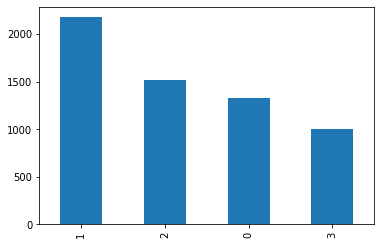

In [45]:
#Distribution of classes
train['SECTION'].value_counts().plot(kind = 'bar')

In [46]:
DATA_COLUMN = 'STORY'
LABEL_COLUMN = 'SECTION'
label_list = [0, 1, 2, 3]

In [47]:
train_InputExamples = train.apply(lambda x: bert.run_classifier.InputExample(guid=None,
                                                                   text_a = x[DATA_COLUMN], 
                                                                   text_b = None, 
                                                                   label = x[LABEL_COLUMN]), axis = 1)

val_InputExamples = val.apply(lambda x: bert.run_classifier.InputExample(guid=None, 
                                                                   text_a = x[DATA_COLUMN], 
                                                                   text_b = None, 
                                                                   label = x[LABEL_COLUMN]), axis = 1)

In [48]:
train_InputExamples

1517    <bert.run_classifier.InputExample object at 0x...
5976    <bert.run_classifier.InputExample object at 0x...
6371    <bert.run_classifier.InputExample object at 0x...
3557    <bert.run_classifier.InputExample object at 0x...
5205    <bert.run_classifier.InputExample object at 0x...
                              ...                        
79      <bert.run_classifier.InputExample object at 0x...
3927    <bert.run_classifier.InputExample object at 0x...
5955    <bert.run_classifier.InputExample object at 0x...
6936    <bert.run_classifier.InputExample object at 0x...
5640    <bert.run_classifier.InputExample object at 0x...
Length: 6026, dtype: object

In [49]:
val_InputExamples

564     <bert.run_classifier.InputExample object at 0x...
2909    <bert.run_classifier.InputExample object at 0x...
4146    <bert.run_classifier.InputExample object at 0x...
5312    <bert.run_classifier.InputExample object at 0x...
5022    <bert.run_classifier.InputExample object at 0x...
                              ...                        
5160    <bert.run_classifier.InputExample object at 0x...
420     <bert.run_classifier.InputExample object at 0x...
3684    <bert.run_classifier.InputExample object at 0x...
4568    <bert.run_classifier.InputExample object at 0x...
4117    <bert.run_classifier.InputExample object at 0x...
Length: 1602, dtype: object

In [50]:
print("Row 0 - guid of training set : ", train_InputExamples.iloc[0].guid)
print("\n__________\nRow 0 - text_a of training set : ", train_InputExamples.iloc[0].text_a)
print("\n__________\nRow 0 - text_b of training set : ", train_InputExamples.iloc[0].text_b)
print("\n__________\nRow 0 - label of training set : ", train_InputExamples.iloc[0].label)

Row 0 - guid of training set :  None

__________
Row 0 - text_a of training set :  The Galaxy M20 is priced at ₹12,990 for the 4GB+64GB variant while the 3GB+32GB variant costs ₹10,990.


Both the devices were a complete sell-out on Amazon India on February 5, making an "unprecedented" first-day sale record for the Korean tech giant.

__________
Row 0 - text_b of training set :  None

__________
Row 0 - label of training set :  1


In [51]:
BERT_MODEL_HUB = "https://tfhub.dev/google/bert_uncased_L-12_H-768_A-12/1"

def create_tokenizer_from_hub_module():
  """Get the vocab file and casing info from the Hub module."""
  with tf.Graph().as_default():
    bert_module = hub.Module(BERT_MODEL_HUB)
    tokenization_info = bert_module(signature="tokenization_info", as_dict=True)
    with tf.Session() as sess:
      vocab_file, do_lower_case = sess.run([tokenization_info["vocab_file"],
                                            tokenization_info["do_lower_case"]])
      
  return bert.tokenization.FullTokenizer(
      vocab_file=vocab_file, do_lower_case=do_lower_case)

tokenizer = create_tokenizer_from_hub_module()

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [52]:
#Here is what the tokenised sample of the first training set observation looks like
print(tokenizer.tokenize(train_InputExamples.iloc[0].text_a))

['the', 'galaxy', 'm2', '##0', 'is', 'priced', 'at', '₹', '##12', ',', '99', '##0', 'for', 'the', '4', '##gb', '+', '64', '##gb', 'variant', 'while', 'the', '3', '##gb', '+', '32', '##gb', 'variant', 'costs', '₹', '##10', ',', '99', '##0', '.', 'both', 'the', 'devices', 'were', 'a', 'complete', 'sell', '-', 'out', 'on', 'amazon', 'india', 'on', 'february', '5', ',', 'making', 'an', '"', 'unprecedented', '"', 'first', '-', 'day', 'sale', 'record', 'for', 'the', 'korean', 'tech', 'giant', '.']


In [53]:
MAX_SEQ_LENGTH = 128

# Convert our train and validation features to InputFeatures that BERT understands.
train_features = bert.run_classifier.convert_examples_to_features(train_InputExamples, label_list, MAX_SEQ_LENGTH, tokenizer)

val_features = bert.run_classifier.convert_examples_to_features(val_InputExamples, label_list, MAX_SEQ_LENGTH, tokenizer)

INFO:tensorflow:Writing example 0 of 6026


INFO:tensorflow:Writing example 0 of 6026


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] the galaxy m2 ##0 is priced at ₹ ##12 , 99 ##0 for the 4 ##gb + 64 ##gb variant while the 3 ##gb + 32 ##gb variant costs ₹ ##10 , 99 ##0 . both the devices were a complete sell - out on amazon india on february 5 , making an " unprecedented " first - day sale record for the korean tech giant . [SEP]


INFO:tensorflow:tokens: [CLS] the galaxy m2 ##0 is priced at ₹ ##12 , 99 ##0 for the 4 ##gb + 64 ##gb variant while the 3 ##gb + 32 ##gb variant costs ₹ ##10 , 99 ##0 . both the devices were a complete sell - out on amazon india on february 5 , making an " unprecedented " first - day sale record for the korean tech giant . [SEP]


INFO:tensorflow:input_ids: 101 1996 9088 25525 2692 2003 21125 2012 1576 12521 1010 5585 2692 2005 1996 1018 18259 1009 4185 18259 8349 2096 1996 1017 18259 1009 3590 18259 8349 5366 1576 10790 1010 5585 2692 1012 2119 1996 5733 2020 1037 3143 5271 1011 2041 2006 9733 2634 2006 2337 1019 1010 2437 2019 1000 15741 1000 2034 1011 2154 5096 2501 2005 1996 4759 6627 5016 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 1996 9088 25525 2692 2003 21125 2012 1576 12521 1010 5585 2692 2005 1996 1018 18259 1009 4185 18259 8349 2096 1996 1017 18259 1009 3590 18259 8349 5366 1576 10790 1010 5585 2692 1012 2119 1996 5733 2020 1037 3143 5271 1011 2041 2006 9733 2634 2006 2337 1019 1010 2437 2019 1000 15741 1000 2034 1011 2154 5096 2501 2005 1996 4759 6627 5016 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 1 (id = 1)


INFO:tensorflow:label: 1 (id = 1)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] the flight to safety is spur ##ring sell - offs in some parts of emerging asia . yields on indonesian debt due in 10 years climbed five basis points to 7 . 66 percent as investors ditch high - beta assets . the inverted yield curve in the world ’ s biggest bond market is sending a negative signal for developing - nation assets , according to win thin , global head of currency strategy at brown brothers ha ##rri ##man & co . in new york . “ if sustained , it would signal a likely u . s . recession in the next six to 24 months , " he said . “ this is hardly con ##du ##ci ##ve to risk and em [SEP]


INFO:tensorflow:tokens: [CLS] the flight to safety is spur ##ring sell - offs in some parts of emerging asia . yields on indonesian debt due in 10 years climbed five basis points to 7 . 66 percent as investors ditch high - beta assets . the inverted yield curve in the world ’ s biggest bond market is sending a negative signal for developing - nation assets , according to win thin , global head of currency strategy at brown brothers ha ##rri ##man & co . in new york . “ if sustained , it would signal a likely u . s . recession in the next six to 24 months , " he said . “ this is hardly con ##du ##ci ##ve to risk and em [SEP]


INFO:tensorflow:input_ids: 101 1996 3462 2000 3808 2003 12996 4892 5271 1011 12446 1999 2070 3033 1997 8361 4021 1012 16189 2006 9003 7016 2349 1999 2184 2086 6589 2274 3978 2685 2000 1021 1012 5764 3867 2004 9387 14033 2152 1011 8247 7045 1012 1996 20037 10750 7774 1999 1996 2088 1521 1055 5221 5416 3006 2003 6016 1037 4997 4742 2005 4975 1011 3842 7045 1010 2429 2000 2663 4857 1010 3795 2132 1997 9598 5656 2012 2829 3428 5292 18752 2386 1004 2522 1012 1999 2047 2259 1012 1523 2065 8760 1010 2009 2052 4742 1037 3497 1057 1012 1055 1012 19396 1999 1996 2279 2416 2000 2484 2706 1010 1000 2002 2056 1012 1523 2023 2003 6684 9530 8566 6895 3726 2000 3891 1998 7861 102


INFO:tensorflow:input_ids: 101 1996 3462 2000 3808 2003 12996 4892 5271 1011 12446 1999 2070 3033 1997 8361 4021 1012 16189 2006 9003 7016 2349 1999 2184 2086 6589 2274 3978 2685 2000 1021 1012 5764 3867 2004 9387 14033 2152 1011 8247 7045 1012 1996 20037 10750 7774 1999 1996 2088 1521 1055 5221 5416 3006 2003 6016 1037 4997 4742 2005 4975 1011 3842 7045 1010 2429 2000 2663 4857 1010 3795 2132 1997 9598 5656 2012 2829 3428 5292 18752 2386 1004 2522 1012 1999 2047 2259 1012 1523 2065 8760 1010 2009 2052 4742 1037 3497 1057 1012 1055 1012 19396 1999 1996 2279 2416 2000 2484 2706 1010 1000 2002 2056 1012 1523 2023 2003 6684 9530 8566 6895 3726 2000 3891 1998 7861 102


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 3 (id = 3)


INFO:tensorflow:label: 3 (id = 3)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] new delhi : b ##hart ##i air ##tel today launched a new app — air ##tel books . with this , air ##tel has further diversified its fast - growing digital content portfolio to add to its popular offerings like w ##yn ##k music and air ##tel tv . available to both air ##tel and non - air ##tel customers in ios and android , air ##tel books will initially offer over 70 , 000 titles from indian and international authors . air ##tel says it plans to rapidly expand its e - books collection by partnering with leading publishers as well as lever ##aging its strategic partnership with jug ##ger ##naut books . [SEP]


INFO:tensorflow:tokens: [CLS] new delhi : b ##hart ##i air ##tel today launched a new app — air ##tel books . with this , air ##tel has further diversified its fast - growing digital content portfolio to add to its popular offerings like w ##yn ##k music and air ##tel tv . available to both air ##tel and non - air ##tel customers in ios and android , air ##tel books will initially offer over 70 , 000 titles from indian and international authors . air ##tel says it plans to rapidly expand its e - books collection by partnering with leading publishers as well as lever ##aging its strategic partnership with jug ##ger ##naut books . [SEP]


INFO:tensorflow:input_ids: 101 2047 6768 1024 1038 10686 2072 2250 9834 2651 3390 1037 2047 10439 1517 2250 9834 2808 1012 2007 2023 1010 2250 9834 2038 2582 24908 2049 3435 1011 3652 3617 4180 11103 2000 5587 2000 2049 2759 14927 2066 1059 6038 2243 2189 1998 2250 9834 2694 1012 2800 2000 2119 2250 9834 1998 2512 1011 2250 9834 6304 1999 16380 1998 11924 1010 2250 9834 2808 2097 3322 3749 2058 3963 1010 2199 4486 2013 2796 1998 2248 6048 1012 2250 9834 2758 2009 3488 2000 5901 7818 2049 1041 1011 2808 3074 2011 27001 2007 2877 8544 2004 2092 2004 15929 16594 2049 6143 5386 2007 26536 4590 24619 2808 1012 102 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 2047 6768 1024 1038 10686 2072 2250 9834 2651 3390 1037 2047 10439 1517 2250 9834 2808 1012 2007 2023 1010 2250 9834 2038 2582 24908 2049 3435 1011 3652 3617 4180 11103 2000 5587 2000 2049 2759 14927 2066 1059 6038 2243 2189 1998 2250 9834 2694 1012 2800 2000 2119 2250 9834 1998 2512 1011 2250 9834 6304 1999 16380 1998 11924 1010 2250 9834 2808 2097 3322 3749 2058 3963 1010 2199 4486 2013 2796 1998 2248 6048 1012 2250 9834 2758 2009 3488 2000 5901 7818 2049 1041 1011 2808 3074 2011 27001 2007 2877 8544 2004 2092 2004 15929 16594 2049 6143 5386 2007 26536 4590 24619 2808 1012 102 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 1 (id = 1)


INFO:tensorflow:label: 1 (id = 1)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] android ' s next major update tentatively named " q " could see the removal of the back button and a quicker app - changing animation when users sw ##ipe to the right . " most of the complaints that people have towards android pie ' s gestures focus on the presence of the dedicated back button and the difficulty of performing the long sw ##ipe up of the pill to open the app drawer . while i don ' t know if the latter gesture will be changed in android q , there ' s a really good chance that google may kill the dedicated back button , " x ##da developers reported on monday . [SEP]


INFO:tensorflow:tokens: [CLS] android ' s next major update tentatively named " q " could see the removal of the back button and a quicker app - changing animation when users sw ##ipe to the right . " most of the complaints that people have towards android pie ' s gestures focus on the presence of the dedicated back button and the difficulty of performing the long sw ##ipe up of the pill to open the app drawer . while i don ' t know if the latter gesture will be changed in android q , there ' s a really good chance that google may kill the dedicated back button , " x ##da developers reported on monday . [SEP]


INFO:tensorflow:input_ids: 101 11924 1005 1055 2279 2350 10651 19325 2315 1000 1053 1000 2071 2156 1996 8208 1997 1996 2067 6462 1998 1037 19059 10439 1011 5278 7284 2043 5198 25430 15457 2000 1996 2157 1012 1000 2087 1997 1996 10821 2008 2111 2031 2875 11924 11345 1005 1055 18327 3579 2006 1996 3739 1997 1996 4056 2067 6462 1998 1996 7669 1997 4488 1996 2146 25430 15457 2039 1997 1996 17357 2000 2330 1996 10439 13065 1012 2096 1045 2123 1005 1056 2113 2065 1996 3732 9218 2097 2022 2904 1999 11924 1053 1010 2045 1005 1055 1037 2428 2204 3382 2008 8224 2089 3102 1996 4056 2067 6462 1010 1000 1060 2850 9797 2988 2006 6928 1012 102 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 11924 1005 1055 2279 2350 10651 19325 2315 1000 1053 1000 2071 2156 1996 8208 1997 1996 2067 6462 1998 1037 19059 10439 1011 5278 7284 2043 5198 25430 15457 2000 1996 2157 1012 1000 2087 1997 1996 10821 2008 2111 2031 2875 11924 11345 1005 1055 18327 3579 2006 1996 3739 1997 1996 4056 2067 6462 1998 1996 7669 1997 4488 1996 2146 25430 15457 2039 1997 1996 17357 2000 2330 1996 10439 13065 1012 2096 1045 2123 1005 1056 2113 2065 1996 3732 9218 2097 2022 2904 1999 11924 1053 1010 2045 1005 1055 1037 2428 2204 3382 2008 8224 2089 3102 1996 4056 2067 6462 1010 1000 1060 2850 9797 2988 2006 6928 1012 102 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 1 (id = 1)


INFO:tensorflow:label: 1 (id = 1)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] the stellar growth saw india up ##ro ##oting the us as the world ’ s second largest mobile phone market by volume - - ranking behind china but hands ##et prices have been sk ##ew ##ed towards lower - end of the market . “ this is likely to change fast . we expect that mid - range smartphone ##s , those with wholesale prices in the range of $ 200 - 400 , will grow 20 per cent year - on - year in 2018 and by almost four times during the next five years to make it one of the most important smartphone segments , " counter ##point research associate director tar ##un path ##ak told pt ##i . he said the sales volume [SEP]


INFO:tensorflow:tokens: [CLS] the stellar growth saw india up ##ro ##oting the us as the world ’ s second largest mobile phone market by volume - - ranking behind china but hands ##et prices have been sk ##ew ##ed towards lower - end of the market . “ this is likely to change fast . we expect that mid - range smartphone ##s , those with wholesale prices in the range of $ 200 - 400 , will grow 20 per cent year - on - year in 2018 and by almost four times during the next five years to make it one of the most important smartphone segments , " counter ##point research associate director tar ##un path ##ak told pt ##i . he said the sales volume [SEP]


INFO:tensorflow:input_ids: 101 1996 17227 3930 2387 2634 2039 3217 20656 1996 2149 2004 1996 2088 1521 1055 2117 2922 4684 3042 3006 2011 3872 1011 1011 5464 2369 2859 2021 2398 3388 7597 2031 2042 15315 7974 2098 2875 2896 1011 2203 1997 1996 3006 1012 1523 2023 2003 3497 2000 2689 3435 1012 2057 5987 2008 3054 1011 2846 26381 2015 1010 2216 2007 17264 7597 1999 1996 2846 1997 1002 3263 1011 4278 1010 2097 4982 2322 2566 9358 2095 1011 2006 1011 2095 1999 2760 1998 2011 2471 2176 2335 2076 1996 2279 2274 2086 2000 2191 2009 2028 1997 1996 2087 2590 26381 9214 1010 1000 4675 8400 2470 5482 2472 16985 4609 4130 4817 2409 13866 2072 1012 2002 2056 1996 4341 3872 102


INFO:tensorflow:input_ids: 101 1996 17227 3930 2387 2634 2039 3217 20656 1996 2149 2004 1996 2088 1521 1055 2117 2922 4684 3042 3006 2011 3872 1011 1011 5464 2369 2859 2021 2398 3388 7597 2031 2042 15315 7974 2098 2875 2896 1011 2203 1997 1996 3006 1012 1523 2023 2003 3497 2000 2689 3435 1012 2057 5987 2008 3054 1011 2846 26381 2015 1010 2216 2007 17264 7597 1999 1996 2846 1997 1002 3263 1011 4278 1010 2097 4982 2322 2566 9358 2095 1011 2006 1011 2095 1999 2760 1998 2011 2471 2176 2335 2076 1996 2279 2274 2086 2000 2191 2009 2028 1997 1996 2087 2590 26381 9214 1010 1000 4675 8400 2470 5482 2472 16985 4609 4130 4817 2409 13866 2072 1012 2002 2056 1996 4341 3872 102


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 1 (id = 1)


INFO:tensorflow:label: 1 (id = 1)


INFO:tensorflow:Writing example 0 of 1602


INFO:tensorflow:Writing example 0 of 1602


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] traders said , reduced demand from local jewel ##lers as well as retail buyers led to the slide in gold prices . in the international market , spot gold was trading at usd 1 , 299 . 30 an ounce while silver was at usd 15 . 31 an ounce in new york . [SEP]


INFO:tensorflow:tokens: [CLS] traders said , reduced demand from local jewel ##lers as well as retail buyers led to the slide in gold prices . in the international market , spot gold was trading at usd 1 , 299 . 30 an ounce while silver was at usd 15 . 31 an ounce in new york . [SEP]


INFO:tensorflow:input_ids: 101 13066 2056 1010 4359 5157 2013 2334 13713 12910 2004 2092 2004 7027 17394 2419 2000 1996 7358 1999 2751 7597 1012 1999 1996 2248 3006 1010 3962 2751 2001 6202 2012 13751 1015 1010 25926 1012 2382 2019 19471 2096 3165 2001 2012 13751 2321 1012 2861 2019 19471 1999 2047 2259 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 13066 2056 1010 4359 5157 2013 2334 13713 12910 2004 2092 2004 7027 17394 2419 2000 1996 7358 1999 2751 7597 1012 1999 1996 2248 3006 1010 3962 2751 2001 6202 2012 13751 1015 1010 25926 1012 2382 2019 19471 2096 3165 2001 2012 13751 2321 1012 2861 2019 19471 1999 2047 2259 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 3 (id = 3)


INFO:tensorflow:label: 3 (id = 3)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] a recent amazon job posting , seeking a quality assurance manager for alexa data services in bucharest , describes the role humans play : “ every day she [ alexa ] listen ##s to thousands of people talking to her about different topics and different languages , and she needs our help to make sense of it all . " the want ad continues : “ this is big data handling like you ’ ve never seen it . we ’ re creating , labeling , cu ##rating and analyzing vast quantities of speech on a daily basis . " amazon ’ s review process for speech data begins when alexa pulls a random , small sampling of customer voice recordings and sends the audio files [SEP]


INFO:tensorflow:tokens: [CLS] a recent amazon job posting , seeking a quality assurance manager for alexa data services in bucharest , describes the role humans play : “ every day she [ alexa ] listen ##s to thousands of people talking to her about different topics and different languages , and she needs our help to make sense of it all . " the want ad continues : “ this is big data handling like you ’ ve never seen it . we ’ re creating , labeling , cu ##rating and analyzing vast quantities of speech on a daily basis . " amazon ’ s review process for speech data begins when alexa pulls a random , small sampling of customer voice recordings and sends the audio files [SEP]


INFO:tensorflow:input_ids: 101 1037 3522 9733 3105 14739 1010 6224 1037 3737 16375 3208 2005 24969 2951 2578 1999 14261 1010 5577 1996 2535 4286 2377 1024 1523 2296 2154 2016 1031 24969 1033 4952 2015 2000 5190 1997 2111 3331 2000 2014 2055 2367 7832 1998 2367 4155 1010 1998 2016 3791 2256 2393 2000 2191 3168 1997 2009 2035 1012 1000 1996 2215 4748 4247 1024 1523 2023 2003 2502 2951 8304 2066 2017 1521 2310 2196 2464 2009 1012 2057 1521 2128 4526 1010 28847 1010 12731 15172 1998 20253 6565 12450 1997 4613 2006 1037 3679 3978 1012 1000 9733 1521 1055 3319 2832 2005 4613 2951 4269 2043 24969 8005 1037 6721 1010 2235 16227 1997 8013 2376 5633 1998 10255 1996 5746 6764 102


INFO:tensorflow:input_ids: 101 1037 3522 9733 3105 14739 1010 6224 1037 3737 16375 3208 2005 24969 2951 2578 1999 14261 1010 5577 1996 2535 4286 2377 1024 1523 2296 2154 2016 1031 24969 1033 4952 2015 2000 5190 1997 2111 3331 2000 2014 2055 2367 7832 1998 2367 4155 1010 1998 2016 3791 2256 2393 2000 2191 3168 1997 2009 2035 1012 1000 1996 2215 4748 4247 1024 1523 2023 2003 2502 2951 8304 2066 2017 1521 2310 2196 2464 2009 1012 2057 1521 2128 4526 1010 28847 1010 12731 15172 1998 20253 6565 12450 1997 4613 2006 1037 3679 3978 1012 1000 9733 1521 1055 3319 2832 2005 4613 2951 4269 2043 24969 8005 1037 6721 1010 2235 16227 1997 8013 2376 5633 1998 10255 1996 5746 6764 102


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 1 (id = 1)


INFO:tensorflow:label: 1 (id = 1)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] new delhi : the bharatiya janata party manifesto monday promised to increase intake capacity of central engineering , management , science and law institutions by 50 % over the next five years if voted to power but remains silent on the impending new education policy . central institutions encompass indian institutes of technology ( ii ##ts ) , indian institute of management ( ii ##ms ) , all indian institutions of medical science ( ai ##im ##s ) , national law universities , indian institute of science technology and research ( ii ##ser ) among others . [SEP]


INFO:tensorflow:tokens: [CLS] new delhi : the bharatiya janata party manifesto monday promised to increase intake capacity of central engineering , management , science and law institutions by 50 % over the next five years if voted to power but remains silent on the impending new education policy . central institutions encompass indian institutes of technology ( ii ##ts ) , indian institute of management ( ii ##ms ) , all indian institutions of medical science ( ai ##im ##s ) , national law universities , indian institute of science technology and research ( ii ##ser ) among others . [SEP]


INFO:tensorflow:input_ids: 101 2047 6768 1024 1996 24243 20308 2283 17124 6928 5763 2000 3623 13822 3977 1997 2430 3330 1010 2968 1010 2671 1998 2375 4896 2011 2753 1003 2058 1996 2279 2274 2086 2065 5444 2000 2373 2021 3464 4333 2006 1996 17945 2047 2495 3343 1012 2430 4896 25281 2796 12769 1997 2974 1006 2462 3215 1007 1010 2796 2820 1997 2968 1006 2462 5244 1007 1010 2035 2796 4896 1997 2966 2671 1006 9932 5714 2015 1007 1010 2120 2375 5534 1010 2796 2820 1997 2671 2974 1998 2470 1006 2462 8043 1007 2426 2500 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 2047 6768 1024 1996 24243 20308 2283 17124 6928 5763 2000 3623 13822 3977 1997 2430 3330 1010 2968 1010 2671 1998 2375 4896 2011 2753 1003 2058 1996 2279 2274 2086 2065 5444 2000 2373 2021 3464 4333 2006 1996 17945 2047 2495 3343 1012 2430 4896 25281 2796 12769 1997 2974 1006 2462 3215 1007 1010 2796 2820 1997 2968 1006 2462 5244 1007 1010 2035 2796 4896 1997 2966 2671 1006 9932 5714 2015 1007 1010 2120 2375 5534 1010 2796 2820 1997 2671 2974 1998 2470 1006 2462 8043 1007 2426 2500 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] facebook declined to comment , while what ##sa ##pp and ins ##tagram did not immediately respond to a request for comment . the panel has previously summoned social network twitter inc ' s chief executive jack dorsey to appear on monday to discuss the same topic . " these are issues for all internet services globally , " twitter said on friday , adding that colin crowe ##ll , its global vice president of public policy , is to meet the panel on monday . [SEP]


INFO:tensorflow:tokens: [CLS] facebook declined to comment , while what ##sa ##pp and ins ##tagram did not immediately respond to a request for comment . the panel has previously summoned social network twitter inc ' s chief executive jack dorsey to appear on monday to discuss the same topic . " these are issues for all internet services globally , " twitter said on friday , adding that colin crowe ##ll , its global vice president of public policy , is to meet the panel on monday . [SEP]


INFO:tensorflow:input_ids: 101 9130 6430 2000 7615 1010 2096 2054 3736 9397 1998 16021 23091 2106 2025 3202 6869 2000 1037 5227 2005 7615 1012 1996 5997 2038 3130 11908 2591 2897 10474 4297 1005 1055 2708 3237 2990 27332 2000 3711 2006 6928 2000 6848 1996 2168 8476 1012 1000 2122 2024 3314 2005 2035 4274 2578 16452 1010 1000 10474 2056 2006 5958 1010 5815 2008 6972 25657 3363 1010 2049 3795 3580 2343 1997 2270 3343 1010 2003 2000 3113 1996 5997 2006 6928 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 9130 6430 2000 7615 1010 2096 2054 3736 9397 1998 16021 23091 2106 2025 3202 6869 2000 1037 5227 2005 7615 1012 1996 5997 2038 3130 11908 2591 2897 10474 4297 1005 1055 2708 3237 2990 27332 2000 3711 2006 6928 2000 6848 1996 2168 8476 1012 1000 2122 2024 3314 2005 2035 4274 2578 16452 1010 1000 10474 2056 2006 5958 1010 5815 2008 6972 25657 3363 1010 2049 3795 3580 2343 1997 2270 3343 1010 2003 2000 3113 1996 5997 2006 6928 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 1 (id = 1)


INFO:tensorflow:label: 1 (id = 1)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] “ in my home , i often communicate in both english and hindi . so i ’ m very excited about this feature that lets me use the assistant in a more natural way , " said gupta . google india ##and ##roid goa ##nd ##roid go pie ##sam ##sun ##g galaxy j ##2 core ##no ##kia ##lav ##ami ##cr ##oma ##x ##go ##og ##le assistant ##go ##og ##le assistant marathi ##go ##og ##le go ##ma ##ps go [SEP]


INFO:tensorflow:tokens: [CLS] “ in my home , i often communicate in both english and hindi . so i ’ m very excited about this feature that lets me use the assistant in a more natural way , " said gupta . google india ##and ##roid goa ##nd ##roid go pie ##sam ##sun ##g galaxy j ##2 core ##no ##kia ##lav ##ami ##cr ##oma ##x ##go ##og ##le assistant ##go ##og ##le assistant marathi ##go ##og ##le go ##ma ##ps go [SEP]


INFO:tensorflow:input_ids: 101 1523 1999 2026 2188 1010 1045 2411 10639 1999 2119 2394 1998 9269 1012 2061 1045 1521 1049 2200 7568 2055 2023 3444 2008 11082 2033 2224 1996 3353 1999 1037 2062 3019 2126 1010 1000 2056 20512 1012 8224 2634 5685 22943 15244 4859 22943 2175 11345 21559 19729 2290 9088 1046 2475 4563 3630 21128 14973 10631 26775 9626 2595 3995 8649 2571 3353 3995 8649 2571 3353 18388 3995 8649 2571 2175 2863 4523 2175 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 1523 1999 2026 2188 1010 1045 2411 10639 1999 2119 2394 1998 9269 1012 2061 1045 1521 1049 2200 7568 2055 2023 3444 2008 11082 2033 2224 1996 3353 1999 1037 2062 3019 2126 1010 1000 2056 20512 1012 8224 2634 5685 22943 15244 4859 22943 2175 11345 21559 19729 2290 9088 1046 2475 4563 3630 21128 14973 10631 26775 9626 2595 3995 8649 2571 3353 3995 8649 2571 3353 18388 3995 8649 2571 2175 2863 4523 2175 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 1 (id = 1)


INFO:tensorflow:label: 1 (id = 1)


In [54]:
print("Sentence : ", train_InputExamples.iloc[0].text_a)
print("-"*30)
print("Tokens : ", tokenizer.tokenize(train_InputExamples.iloc[0].text_a))
print("-"*30)
print("Input IDs : ", train_features[0].input_ids)
print("-"*30)
print("Input Masks : ", train_features[0].input_mask)
print("-"*30)
print("Segment IDs : ", train_features[0].segment_ids)

Sentence :  The Galaxy M20 is priced at ₹12,990 for the 4GB+64GB variant while the 3GB+32GB variant costs ₹10,990.


Both the devices were a complete sell-out on Amazon India on February 5, making an "unprecedented" first-day sale record for the Korean tech giant.
------------------------------
Tokens :  ['the', 'galaxy', 'm2', '##0', 'is', 'priced', 'at', '₹', '##12', ',', '99', '##0', 'for', 'the', '4', '##gb', '+', '64', '##gb', 'variant', 'while', 'the', '3', '##gb', '+', '32', '##gb', 'variant', 'costs', '₹', '##10', ',', '99', '##0', '.', 'both', 'the', 'devices', 'were', 'a', 'complete', 'sell', '-', 'out', 'on', 'amazon', 'india', 'on', 'february', '5', ',', 'making', 'an', '"', 'unprecedented', '"', 'first', '-', 'day', 'sale', 'record', 'for', 'the', 'korean', 'tech', 'giant', '.']
------------------------------
Input IDs :  [101, 1996, 9088, 25525, 2692, 2003, 21125, 2012, 1576, 12521, 1010, 5585, 2692, 2005, 1996, 1018, 18259, 1009, 4185, 18259, 8349, 2096, 1996, 1017, 1825

In [55]:
def create_model(is_predicting, input_ids, input_mask, segment_ids, labels,
                 num_labels):
  
  bert_module = hub.Module(
      BERT_MODEL_HUB,
      trainable=True)
  bert_inputs = dict(
      input_ids=input_ids,
      input_mask=input_mask,
      segment_ids=segment_ids)
  bert_outputs = bert_module(
      inputs=bert_inputs,
      signature="tokens",
      as_dict=True)

  # Use "pooled_output" for classification tasks on an entire sentence.
  # Use "sequence_outputs" for token-level output.
  output_layer = bert_outputs["pooled_output"]

  hidden_size = output_layer.shape[-1].value

  # Create our own layer to tune for politeness data.
  output_weights = tf.get_variable(
      "output_weights", [num_labels, hidden_size],
      initializer=tf.truncated_normal_initializer(stddev=0.02))

  output_bias = tf.get_variable(
      "output_bias", [num_labels], initializer=tf.zeros_initializer())

  with tf.variable_scope("loss"):

    # Dropout helps prevent overfitting
    output_layer = tf.nn.dropout(output_layer, keep_prob=0.9)

    logits = tf.matmul(output_layer, output_weights, transpose_b=True)
    logits = tf.nn.bias_add(logits, output_bias)
    log_probs = tf.nn.log_softmax(logits, axis=-1)

    # Convert labels into one-hot encoding
    one_hot_labels = tf.one_hot(labels, depth=num_labels, dtype=tf.float32)

    predicted_labels = tf.squeeze(tf.argmax(log_probs, axis=-1, output_type=tf.int32))
    # If we're predicting, we want predicted labels and the probabiltiies.
    if is_predicting:
      return (predicted_labels, log_probs)

    # If we're train/eval, compute loss between predicted and actual label
    per_example_loss = -tf.reduce_sum(one_hot_labels * log_probs, axis=-1)
    loss = tf.reduce_mean(per_example_loss)
    return (loss, predicted_labels, log_probs)

In [56]:
#A function that adapts our model to work for training, evaluation, and prediction.

# model_fn_builder actually creates our model function
# using the passed parameters for num_labels, learning_rate, etc.
def model_fn_builder(num_labels, learning_rate, num_train_steps,
                     num_warmup_steps):
  """Returns `model_fn` closure for TPUEstimator."""
  def model_fn(features, labels, mode, params):  # pylint: disable=unused-argument
    """The `model_fn` for TPUEstimator."""

    input_ids = features["input_ids"]
    input_mask = features["input_mask"]
    segment_ids = features["segment_ids"]
    label_ids = features["label_ids"]

    is_predicting = (mode == tf.estimator.ModeKeys.PREDICT)
    
    # TRAIN and EVAL
    if not is_predicting:

      (loss, predicted_labels, log_probs) = create_model(
        is_predicting, input_ids, input_mask, segment_ids, label_ids, num_labels)

      train_op = bert.optimization.create_optimizer(
          loss, learning_rate, num_train_steps, num_warmup_steps, use_tpu=False)

      # Calculate evaluation metrics. 
      def metric_fn(label_ids, predicted_labels):
        accuracy = tf.metrics.accuracy(label_ids, predicted_labels)
        true_pos = tf.metrics.true_positives(
            label_ids,
            predicted_labels)
        true_neg = tf.metrics.true_negatives(
            label_ids,
            predicted_labels)   
        false_pos = tf.metrics.false_positives(
            label_ids,
            predicted_labels)  
        false_neg = tf.metrics.false_negatives(
            label_ids,
            predicted_labels)
        
        return {
            "eval_accuracy": accuracy,
            "true_positives": true_pos,
            "true_negatives": true_neg,
            "false_positives": false_pos,
            "false_negatives": false_neg
            }

      eval_metrics = metric_fn(label_ids, predicted_labels)

      if mode == tf.estimator.ModeKeys.TRAIN:
        return tf.estimator.EstimatorSpec(mode=mode,
          loss=loss,
          train_op=train_op)
      else:
          return tf.estimator.EstimatorSpec(mode=mode,
            loss=loss,
            eval_metric_ops=eval_metrics)
    else:
      (predicted_labels, log_probs) = create_model(
        is_predicting, input_ids, input_mask, segment_ids, label_ids, num_labels)

      predictions = {
          'probabilities': log_probs,
          'labels': predicted_labels
      }
      return tf.estimator.EstimatorSpec(mode, predictions=predictions)

  # Return the actual model function in the closure
  return model_fn

In [57]:
# These hyperparameters are copied from this colab notebook (https://colab.sandbox.google.com/github/tensorflow/tpu/blob/master/tools/colab/bert_finetuning_with_cloud_tpus.ipynb)
BATCH_SIZE = 30
LEARNING_RATE = 2e-5
NUM_TRAIN_EPOCHS = 3.0
# Warmup is a period of time where the learning rate is small and gradually increases--usually helps training.
WARMUP_PROPORTION = 0.1
# Model configs
SAVE_CHECKPOINTS_STEPS = 300
SAVE_SUMMARY_STEPS = 100

# Compute train and warmup steps from batch size
num_train_steps = int(len(train_features) / BATCH_SIZE * NUM_TRAIN_EPOCHS)
num_warmup_steps = int(num_train_steps * WARMUP_PROPORTION)

# Specify output directory and number of checkpoint steps to save
run_config = tf.estimator.RunConfig(
    model_dir=OUTPUT_DIR,
    save_summary_steps=SAVE_SUMMARY_STEPS,
    save_checkpoints_steps=SAVE_CHECKPOINTS_STEPS)

# Specify output directory and number of checkpoint steps to save
run_config = tf.estimator.RunConfig(
    model_dir=OUTPUT_DIR,
    save_summary_steps=SAVE_SUMMARY_STEPS,
    save_checkpoints_steps=SAVE_CHECKPOINTS_STEPS)

In [58]:
#Initializing the model and the estimator
model_fn = model_fn_builder(
  num_labels=len(label_list),
  learning_rate=LEARNING_RATE,
  num_train_steps=num_train_steps,
  num_warmup_steps=num_warmup_steps)

estimator = tf.estimator.Estimator(
  model_fn=model_fn,
  config=run_config,
  params={"batch_size": BATCH_SIZE})

INFO:tensorflow:Using config: {'_model_dir': '/content/drive/My Drive/BERT', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': 300, '_save_checkpoints_secs': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7facb4a126a0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using config: {'_model_dir': '/content/drive/My Drive/BERT', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': 300, '_save_checkpoints_secs': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7facb4a126a0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [59]:
# Create an input function for training. drop_remainder = True for using TPUs.
train_input_fn = bert.run_classifier.input_fn_builder(
    features=train_features,
    seq_length=MAX_SEQ_LENGTH,
    is_training=True,
    drop_remainder=False)

# Create an input function for validating. drop_remainder = True for using TPUs.
val_input_fn = run_classifier.input_fn_builder(
    features=val_features,
    seq_length=MAX_SEQ_LENGTH,
    is_training=False,
    drop_remainder=False)

In [ ]:
#Training the model
print(f'Beginning Training!')
current_time = datetime.now()
estimator.train(input_fn=train_input_fn, max_steps=num_train_steps)
print("Training took time ", datetime.now() - current_time)

Beginning Training!
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore
/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /content/drive/My Drive/BERT/model.ckpt-0


INFO:tensorflow:Restoring parameters from /content/drive/My Drive/BERT/model.ckpt-0


Instructions for updating:
Use standard file utilities to get mtimes.


Instructions for updating:
Use standard file utilities to get mtimes.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Saving checkpoints for 0 into /content/drive/My Drive/BERT/model.ckpt.


INFO:tensorflow:Saving checkpoints for 0 into /content/drive/My Drive/BERT/model.ckpt.


INFO:tensorflow:loss = 1.5102636, step = 1


INFO:tensorflow:loss = 1.5102636, step = 1


In [ ]:
#Evaluating the model with Validation set
estimator.evaluate(input_fn=val_input_fn, steps=None)

In [ ]:
"""Politics: 0
Technology: 1
Entertainment: 2
Business: 3"""

# A method to get predictions
def getPrediction(in_sentences):
  #A list to map the actual labels to the predictions
  labels = ["Politics", "Technology","Entertainment","Business"]

  #Transforming the test data into BERT accepted form
  input_examples = [run_classifier.InputExample(guid="", text_a = x, text_b = None, label = 0) for x in in_sentences] 
  
  #Creating input features for Test data
  input_features = run_classifier.convert_examples_to_features(input_examples, label_list, MAX_SEQ_LENGTH, tokenizer)

  #Predicting the classes 
  predict_input_fn = run_classifier.input_fn_builder(features=input_features, seq_length=MAX_SEQ_LENGTH, is_training=False, drop_remainder=False)
  predictions = estimator.predict(predict_input_fn)
  return [(sentence, prediction['probabilities'],prediction['labels'], labels[prediction['labels']]) for sentence, prediction in zip(in_sentences, predictions)]

In [ ]:
pred_sentences = list(test['STORY'])

predictions = getPrediction(pred_sentences)

In [ ]:
predictions[0]